## <center>PCA Assignment</center>

#### Problem Statement:
<code style="background:lightblue;color:black">Performing the  Principal component analysis and performing clustering using first 3 principal component scores (Using both heirarchial and k mean clustering (scree plot or elbow curve)
Obtaining optimum number of clusters and checking whether we have obtained same number of clusters with the original data (class column we have ignored at the begining which shows that it has 3 clusters).</code>

In [1]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the respective csv file and having a glance at it
wine_data = pd.read_csv("wine.csv")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Making necessary EDA for the model

In [3]:
#checking the unique values in the given data
wine_data.Type.unique()

array([1, 2, 3], dtype=int64)

In [4]:
#checking the rows and columns of the dataset
wine_data.shape

(178, 14)

In [5]:
#dropping the type column since it contains three unique values which might be considered as 3 clusters
wine1 = wine_data.drop("Type",axis=1)
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#checking the rows and columns of new data 
wine1.shape

(178, 13)

In [7]:
#checking for the datatype and if any nulls values present in the dataset
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
#checking for the duplicate values if present any
wine1[wine1.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


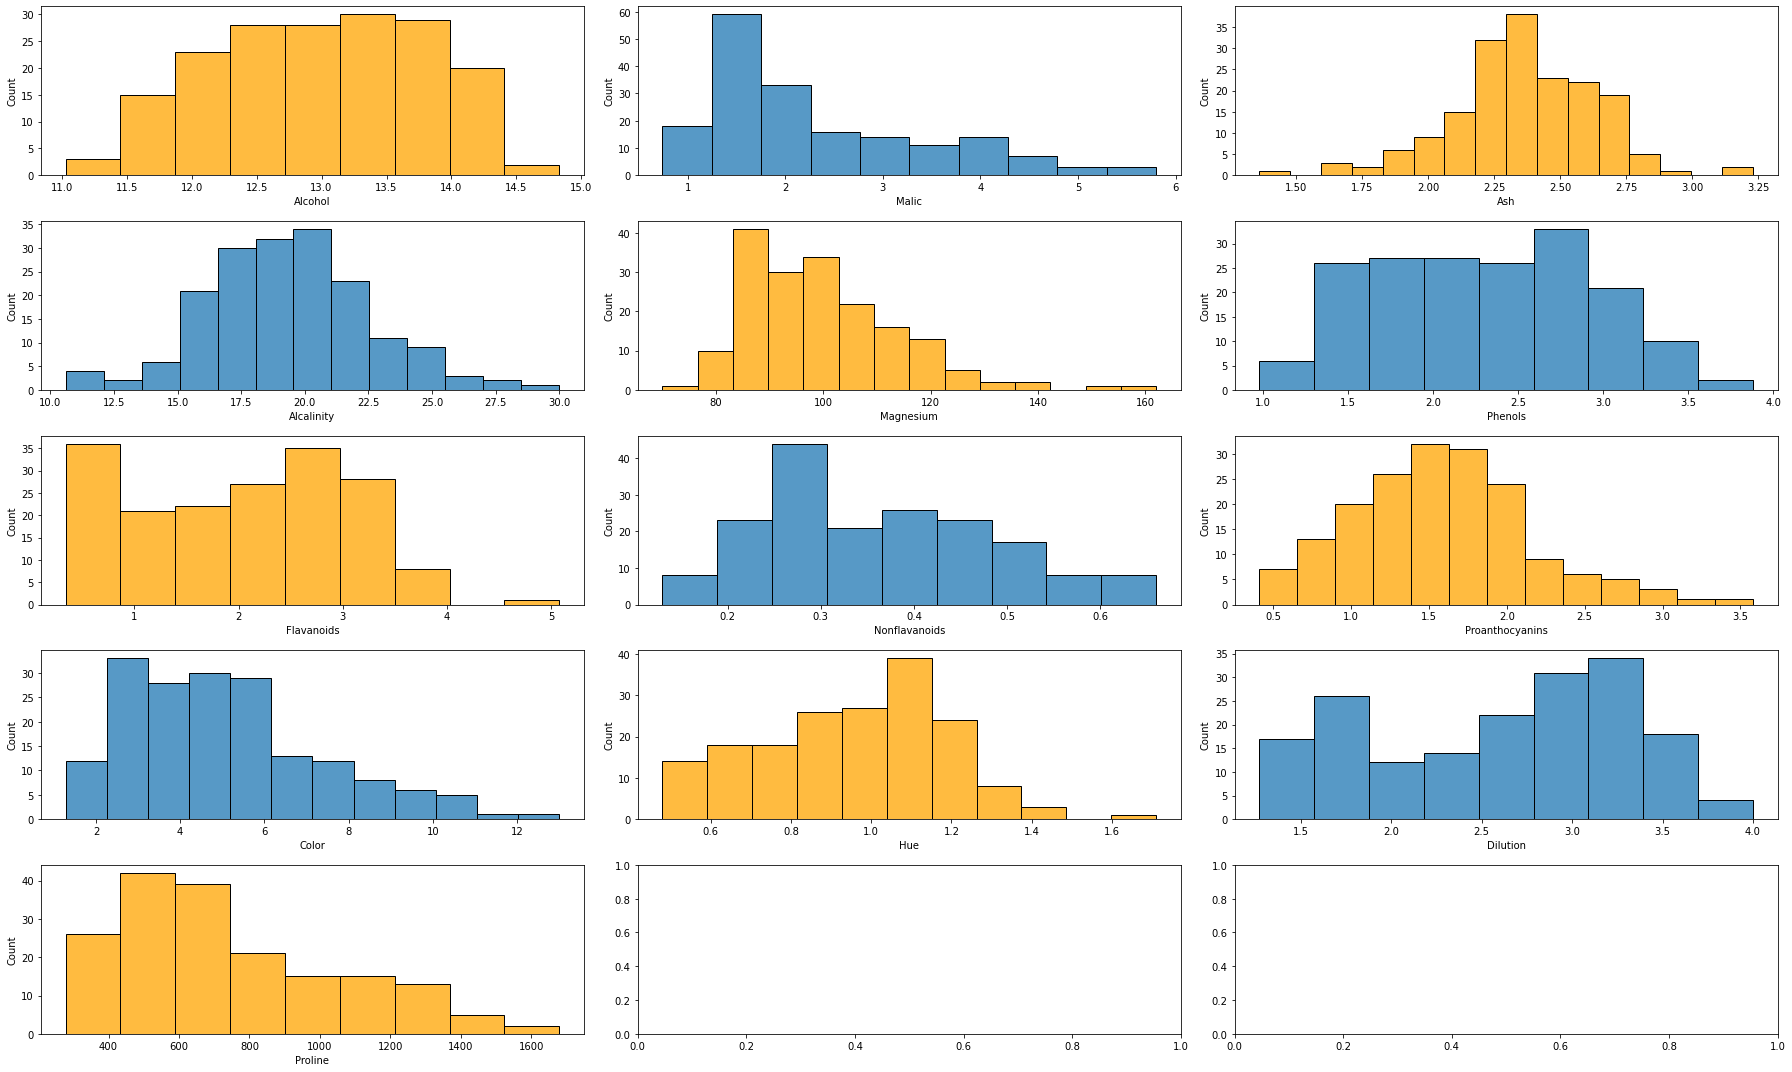

In [9]:
#checking for the outliers in the dataset using the plots
fig, ax = plt.subplots(5, 3, figsize=(25,15))

sns.histplot(wine1.Alcohol,ax=ax[0,0],color='orange')
sns.histplot(wine1.Malic,ax=ax[0,1])
sns.histplot(wine1.Ash,ax=ax[0,2],color='orange')

sns.histplot(wine1.Alcalinity,ax=ax[1,0])
sns.histplot(wine1.Magnesium,ax=ax[1,1],color='orange')
sns.histplot(wine1.Phenols,ax=ax[1,2])

sns.histplot(wine1.Flavanoids,ax=ax[2,0],color='orange')
sns.histplot(wine1.Nonflavanoids,ax=ax[2,1])
sns.histplot(wine1.Proanthocyanins,ax=ax[2,2],color='orange')

sns.histplot(wine1.Color,ax=ax[3,0])
sns.histplot(wine1.Hue,ax=ax[3,1],color='orange')
sns.histplot(wine1.Dilution,ax=ax[3,2])

sns.histplot(wine1.Proline, ax=ax[4,0],color='orange')
plt.tight_layout()
plt.show()

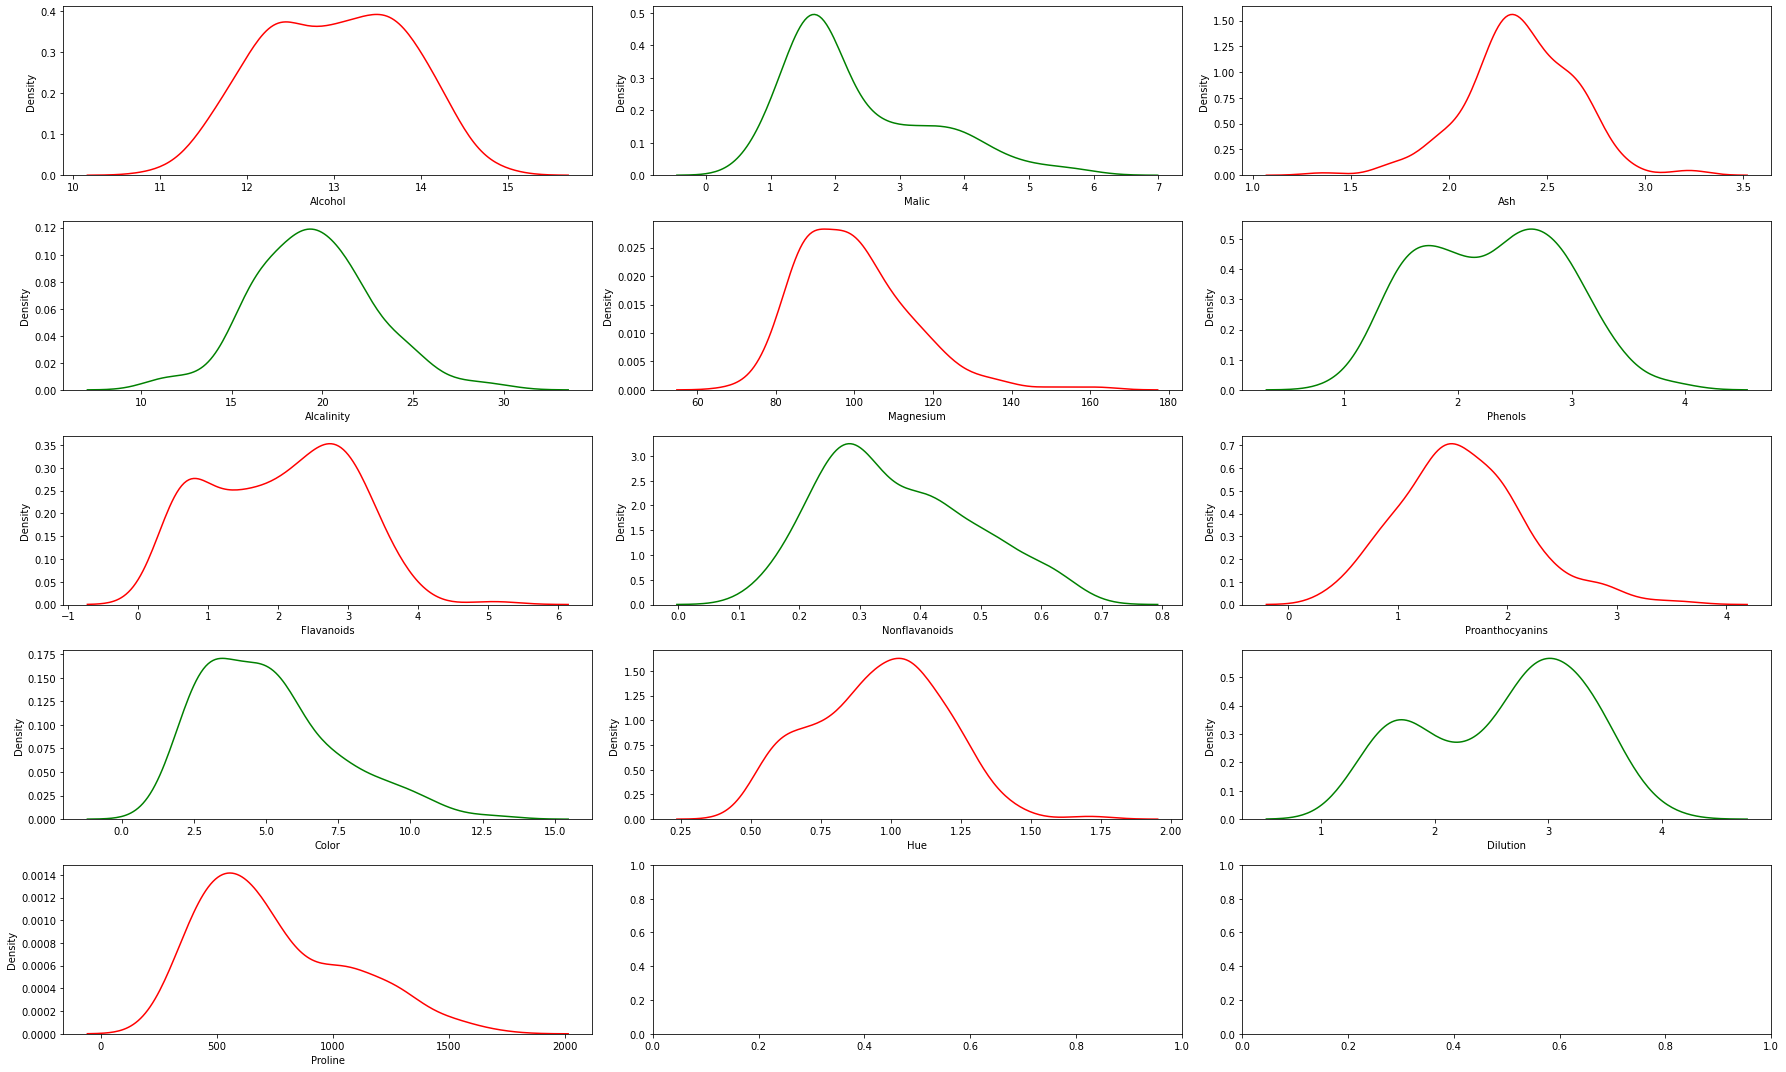

In [10]:
#checking if our data follows normal distribution or not
fig, ax = plt.subplots(5, 3, figsize=(25,15))

sns.kdeplot(wine1.Alcohol,ax=ax[0,0],color='red')
sns.kdeplot(wine1.Malic,ax=ax[0,1],color='g')
sns.kdeplot(wine1.Ash,ax=ax[0,2],color='red')

sns.kdeplot(wine1.Alcalinity,ax=ax[1,0],color='g')
sns.kdeplot(wine1.Magnesium,ax=ax[1,1],color='red')
sns.kdeplot(wine1.Phenols,ax=ax[1,2],color='g')

sns.kdeplot(wine1.Flavanoids,ax=ax[2,0],color='red')
sns.kdeplot(wine1.Nonflavanoids,ax=ax[2,1],color='g')
sns.kdeplot(wine1.Proanthocyanins,ax=ax[2,2],color='red')

sns.kdeplot(wine1.Color,ax=ax[3,0],color='g')
sns.kdeplot(wine1.Hue,ax=ax[3,1],color='red')
sns.kdeplot(wine1.Dilution,ax=ax[3,2],color='g')

sns.kdeplot(wine1.Proline,ax=ax[4,0],color='red')
plt.tight_layout()
plt.show()

In [11]:
#Normalizing the data inorder to avoid the variances in the data
wine1_norm = scale(wine1)
wine1_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### Performing the Heirarchical Clustering using different types of linkage models
>Here Initially Heirarchical Clustering is performed on different types of linkage models and its performance is checked and then PCA is performed on it

### Performing Simple Linkage Model

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

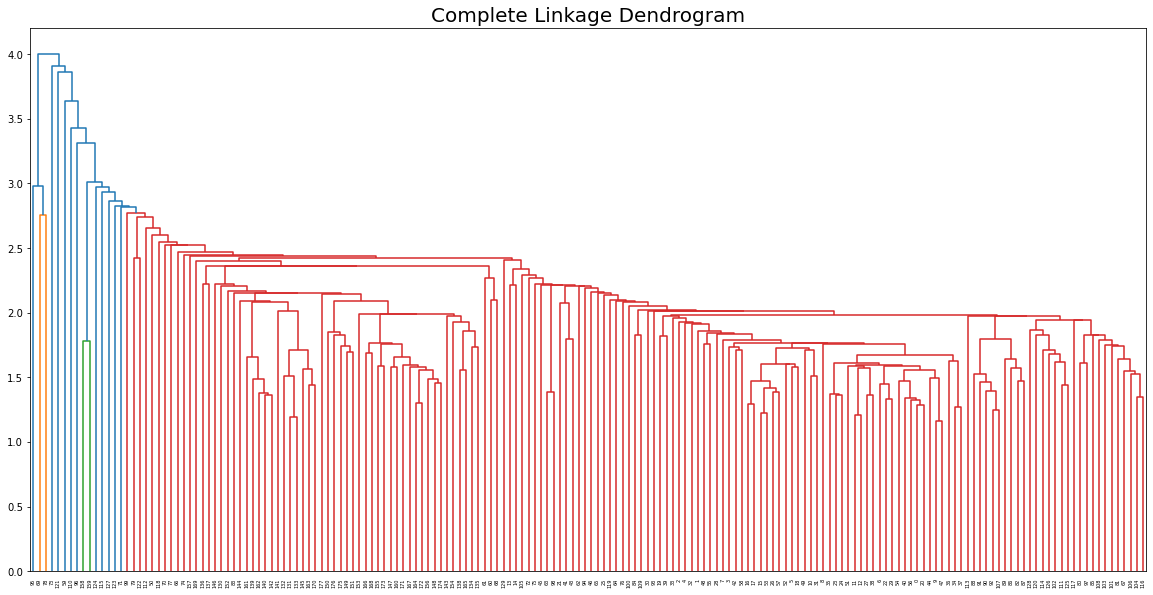

In [12]:
#Plotting the dendogram plot for the Complete Linkage Model
fig=plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_norm, method='single'))
plt.title("Complete Linkage Dendrogram",size=20)

In [13]:
#Building single linkage model with two cluster 
hc1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [14]:
#fitting the model on the data
y_hc1 = hc1.fit_predict(wine1_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

#Creating the cluster column for the built model
wine_data['cluster'] = y_hc1

In [15]:
#Checking how many values fall under each of the clusters created
for i in range(2):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
   

cluster 0
Total Values: 175
cluster 1
Total Values: 3


### Performing Complete Linkage Model

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

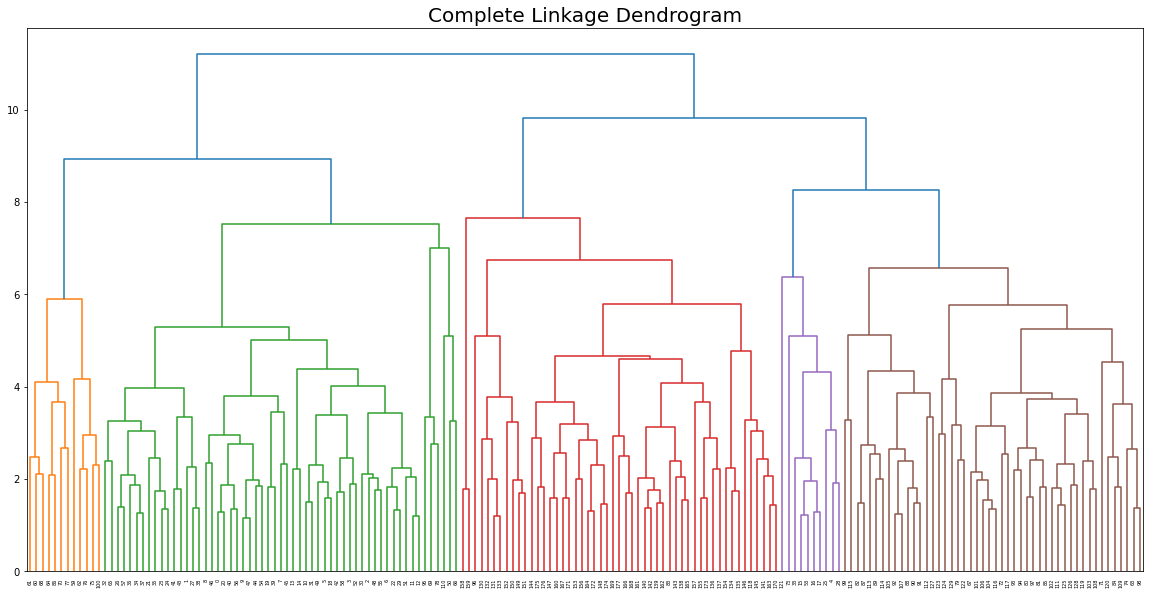

In [16]:
#Plotting the dendogram plot for the Complete Linkage Model
fig=plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_norm, method='complete'))
plt.title("Complete Linkage Dendrogram",size=20)

In [17]:
#Building complete Linkage model
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [18]:
#fitting the model on the data
y_hc2 = hc2.fit_predict(wine1_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

#Creating the cluster column for the build model
wine_data['cluster'] = y_hc2

In [19]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))


cluster 0
Total Values: 58
cluster 1
Total Values: 57
cluster 2
Total Values: 51
cluster 3
Total Values: 12


### Performing Average Linkage Model

Text(0.5, 1.0, 'Average Linkage Dendrogram')

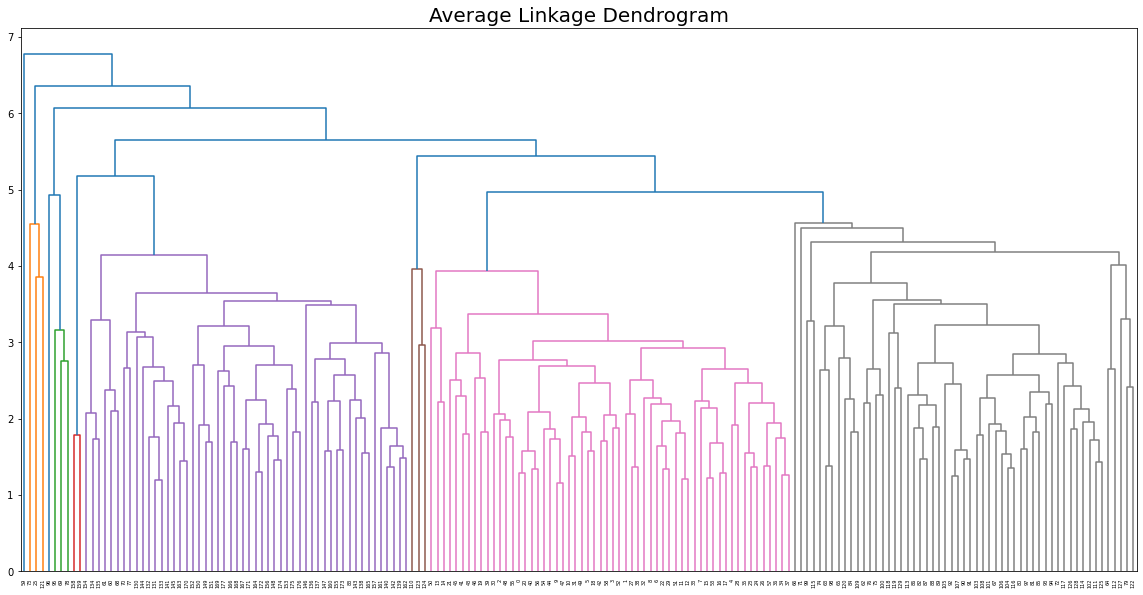

In [20]:
#Plotting the dendogram plot for the Average Linkage Model
fig=plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_norm, method='average'))
plt.title("Average Linkage Dendrogram",size=20)

In [21]:
#Building the Average Linkage Model
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [22]:
#fitting the model on the data
y_hc3 = hc3.fit_predict(wine1_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

##Creating the cluster column for the build model
wine_data['cluster'] = y_hc3

In [23]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
   

cluster 0
Total Values: 116
cluster 1
Total Values: 54
cluster 2
Total Values: 3
cluster 3
Total Values: 1
cluster 4
Total Values: 4


### Performing Centroid(ward) Linkage model

Text(0.5, 1.0, 'Dendrogram')

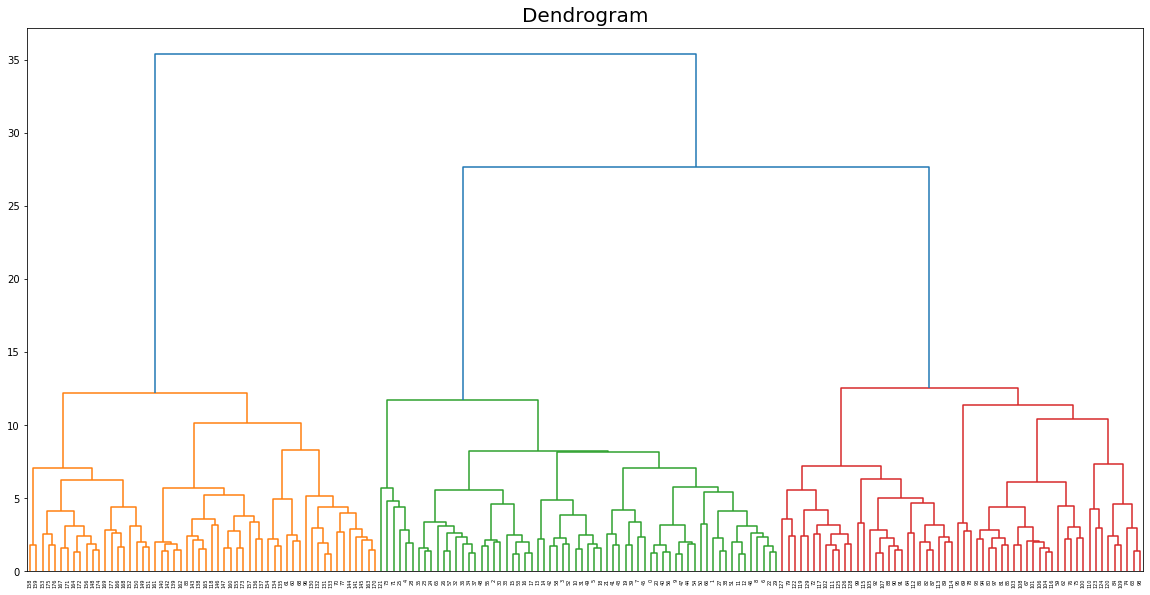

In [24]:
#Plotting the dendogram plot for Centroid Linkage Model
fig=plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_norm, method='ward'))
plt.title("Dendrogram",size=20)

In [25]:
#Building Centroid Linkage model
hc4 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [26]:
#fitting the model on the data
y_hc4 = hc4.fit_predict(wine1_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

#Creating the cluster column for the build model
wine_data['cluster'] = y_hc4

In [27]:
#Checking how many values fall under each of the clusters created
for i in range(3):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
   

cluster 0
Total Values: 58
cluster 1
Total Values: 56
cluster 2
Total Values: 64


### Performing KMeans Clustering

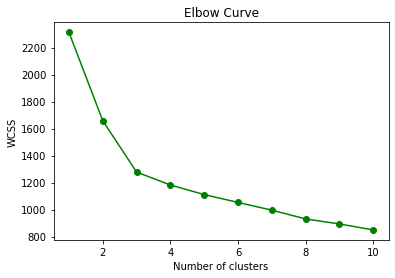

In [28]:
#Plotting an elbow curve to check for k value
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine1_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

>From the above Elbow curve we can say that we got k=3 that is 3 clusters

In [29]:
#Building K-means Clustering model and fitting the data into it
Clusters_newdata = KMeans(3, random_state=42)
Clusters_newdata.fit(wine1_norm)

KMeans(n_clusters=3, random_state=42)

In [30]:
#Creating labels and then creating new column to put into our dataset
KMeans_label=Clusters_newdata.labels_
wine_data['cluster'] = Clusters_newdata.labels_

In [31]:
#Checking how many values fall under each of the clusters created
for i in range(3):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total Values: 62
cluster 1
Total Values: 51
cluster 2
Total Values: 65


### Evaluating Clustering methods with the help of Silhouette Score 
>The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguised.<br>
0:Means the distance between clusters is not significant<br>
-1:Means clusters are assigned in the wrong way

In [32]:
#Silhouette Score of Single Linkage Method
Silhou_SLM=metrics.silhouette_score(wine1_norm,y_hc1)
Silhou_SLM

0.2224506072765093

In [33]:
#Silhouette Score of Complete Linkage Method
Silhou_ComLM=metrics.silhouette_score(wine1_norm,y_hc2)
Silhou_ComLM

0.19382526203175696

In [34]:
#Silhouette Score of Average Linkage Method
Silhou_Average=metrics.silhouette_score(wine1_norm,y_hc3)
Silhou_Average

0.2294575629590144

In [35]:
#Silhouette Score of Centroid(ward) Linkage Method
Silhou_CenLM=metrics.silhouette_score(wine1_norm,y_hc4)
Silhou_CenLM

0.2774439826952266

In [36]:
#Silhouette Score of Kmeans Clustering
Silhou_KMeans=metrics.silhouette_score(wine1_norm,KMeans_label)
Silhou_KMeans

0.2848589191898986

In [37]:
#Listing into the table
Table={'Model':pd.Series(['HC_SingleLinakge','HC_CompleteLinkage','HC_AverageLinkage','HC_CentroidLinkage','KMeans']),
  'Silhouette score':[Silhou_SLM,Silhou_ComLM,Silhou_Average,Silhou_CenLM,Silhou_KMeans]
  }
Table=pd.DataFrame(Table)
Table

,Model,Silhouette score
0,HC_SingleLinakge,0.222451
1,HC_CompleteLinkage,0.193825
2,HC_AverageLinkage,0.229458
3,HC_CentroidLinkage,0.277444
4,KMeans,0.284859


## PCA Method

>In order to perform PCA we have first and foremost have to standardize or normalize the data inorder to avoid variance between them

In [38]:
#Normalizing the data
pca = PCA()
pca_values = pca.fit_transform(wine1_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [39]:
#Applying the PCA on the dataset with 13components first
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine1_norm)

In [40]:
#checking the variance of the PCA components 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

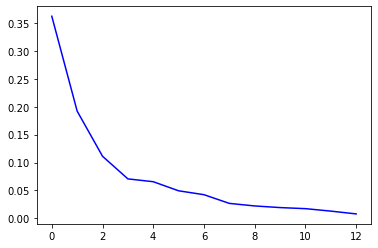

In [41]:
plt.plot(var,color="blue")

In [42]:
#checking the cummulative variance of the PCA components
varc = np.cumsum(np.round(var,decimals = 4)*100)
varc

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

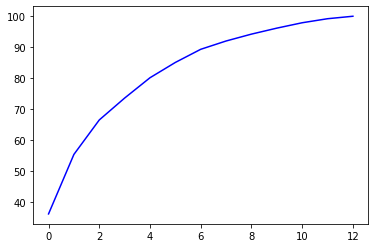

In [43]:
plt.plot(varc,color="blue")

In [44]:
#Checking the components of the PCA
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [45]:
#Considering the PCA of 3 components
PCA_wine=pca_values[:,0:3]

### Now Building the Clustering Models with 3 PCA components

#### Performing Simple Linkage Model on 3 components

Text(0.5, 1.0, 'Simple linkage Method Dendrogram')

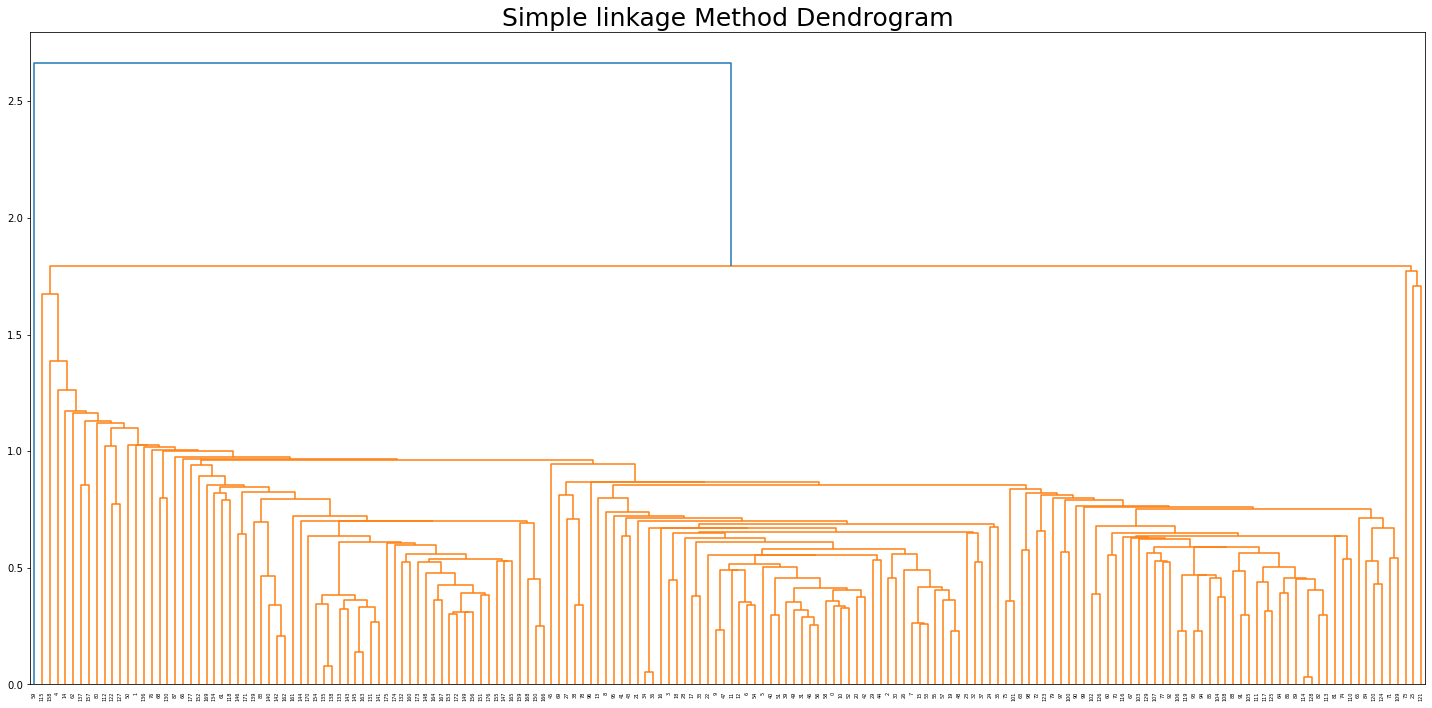

In [46]:
#Plotting the dendogram plot for the Single Linkage Model
fig=plt.figure(figsize=(25,12))
dendrogram = sch.dendrogram(sch.linkage(PCA_wine, method='single'),)
plt.title("Simple linkage Method Dendrogram",size=25)

In [47]:
#Building single linkage model with five cluster
PCA_hc1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [48]:
#Fitting the model and Creating the cluster column for the built model
y_PCAhc1 = PCA_hc1 .fit_predict(PCA_wine)
Clusters=pd.DataFrame(y_PCAhc1,columns=['Clusters'])

wine_data['cluster'] = y_PCAhc1

In [49]:
#Checking how many values fall under each of the clusters created
for i in range(2):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total Values: 177
cluster 1
Total Values: 1


#### Performing Complete Linkage Model on 3 Components

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

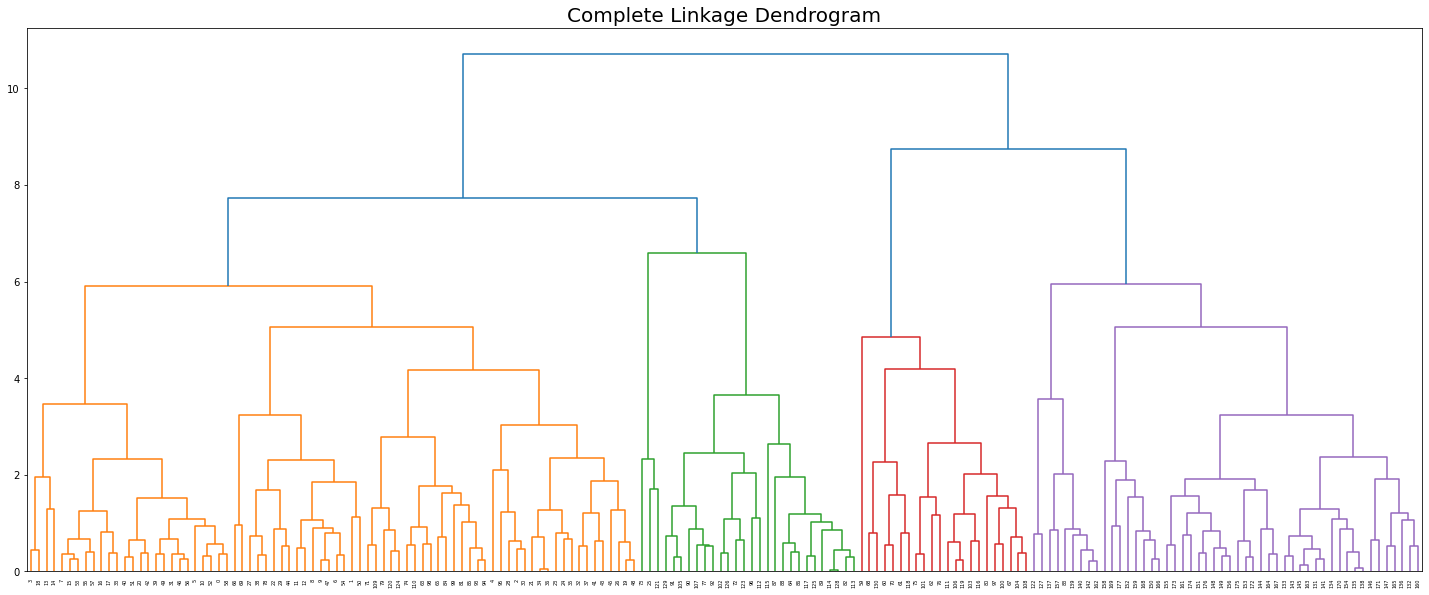

In [50]:
#Plotting the dendogram plot for the Complete Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(PCA_wine, method='complete'))
plt.title("Complete Linkage Dendrogram",size=20)

In [51]:
#Building single linkage model with four cluster 
PCA_hc2= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [52]:
#Fitting the model and Creating the cluster column for the built model
y_PCAhc2 = PCA_hc2 .fit_predict(PCA_wine)
Clusters=pd.DataFrame(y_PCAhc2,columns=['Clusters'])

wine_data['cluster'] = y_PCAhc2

In [53]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total Values: 28
cluster 1
Total Values: 50
cluster 2
Total Values: 22
cluster 3
Total Values: 78


#### Performing Average Linkage Model on 3 Components

Text(0.5, 1.0, 'Average Linkage Dendrogram')

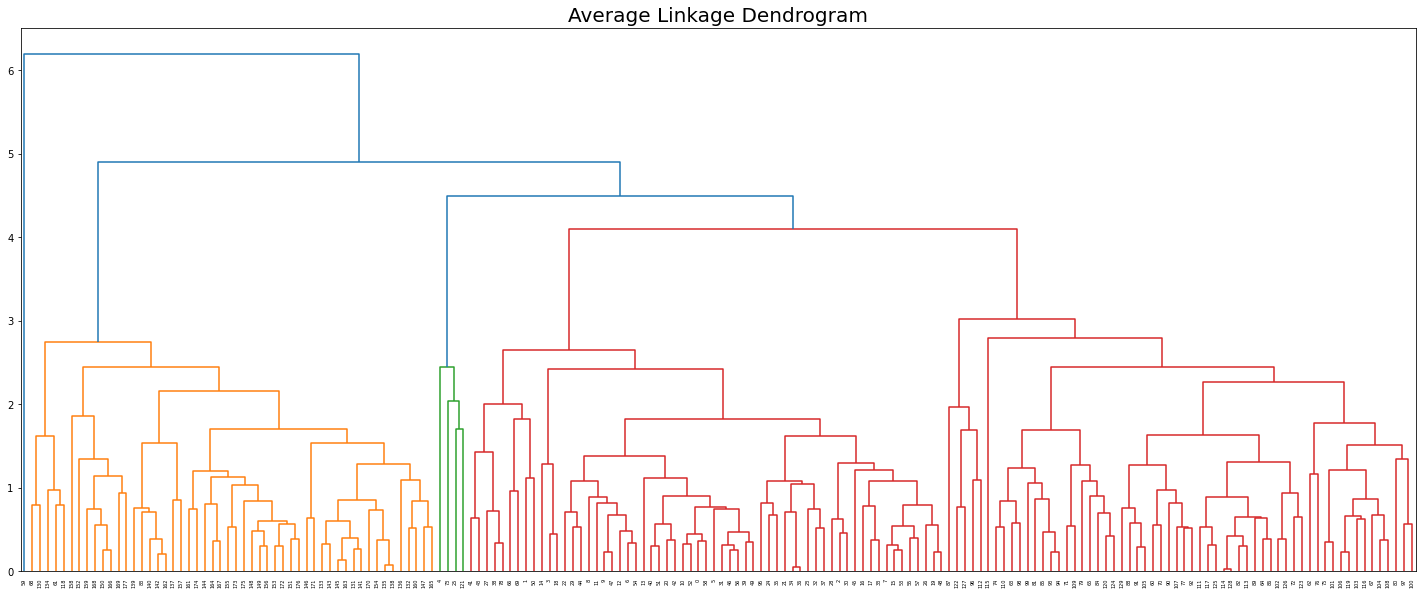

In [54]:
#Plotting the dendogram plot for the Average Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(PCA_wine, method='average'))
plt.title("Average Linkage Dendrogram",size=20)

In [55]:
#Building the Average Linkage Model
PCA_hc3= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [56]:
#Fitting the model and Creating the cluster column for the built model
y_PCAhc3 = PCA_hc3.fit_predict(PCA_wine)
Clusters=pd.DataFrame(y_PCAhc3,columns=['Clusters'])

wine_data['cluster'] = y_PCAhc3

In [57]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total Values: 60
cluster 1
Total Values: 61
cluster 2
Total Values: 52
cluster 3
Total Values: 1
cluster 4
Total Values: 4


#### Performing Centroid(Ward) Linkage Model on 3 Components

Text(0.5, 1.0, 'Centroid Linkage Dendrogram')

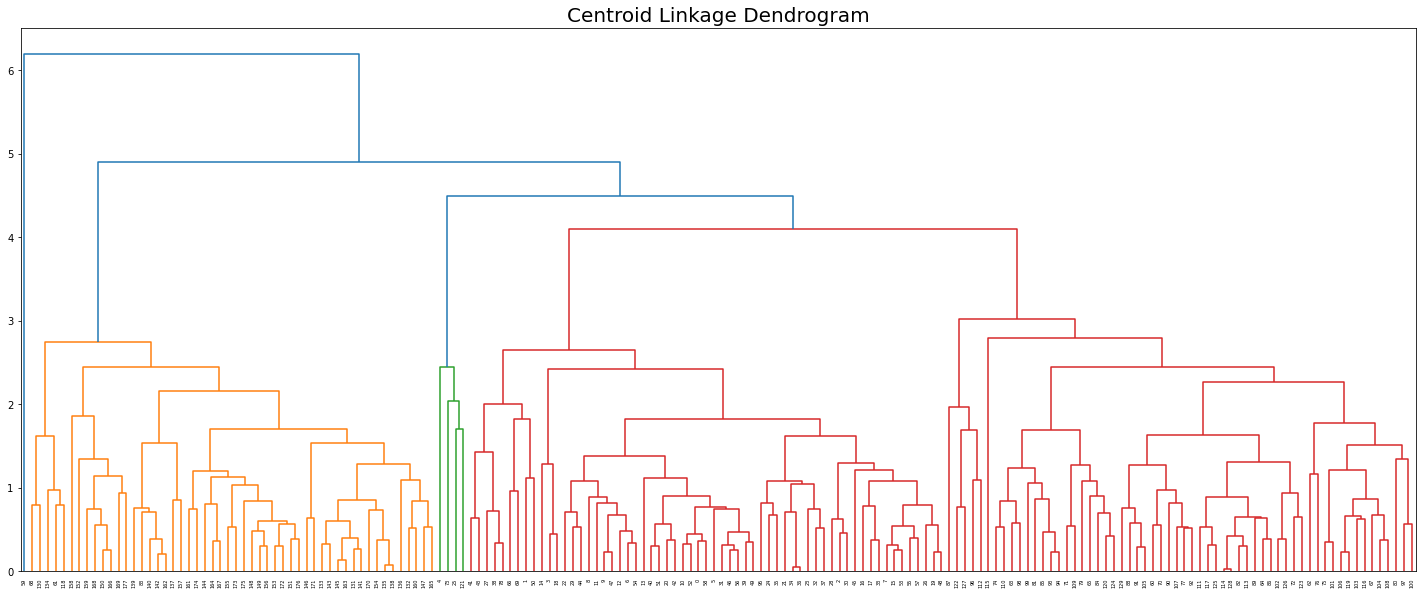

In [58]:
#Plotting the dendogram plot for Centroid Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(PCA_wine, method='average'))
plt.title("Centroid Linkage Dendrogram",size=20)

In [59]:
#Building Centroid Linkage model
PCA_hc4= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [60]:
#Fitting the model and Creating the cluster column for the built model
y_PCAhc4 = PCA_hc4.fit_predict(PCA_wine)
Clusters=pd.DataFrame(y_PCAhc4,columns=['Clusters'])

wine_data['cluster'] = y_PCAhc4

In [61]:
#Checking how many values fall under each of the clusters created
for i in range(3):
    print("cluster", i)
    print("Total Values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total Values: 66
cluster 1
Total Values: 47
cluster 2
Total Values: 65


#### Performing Kmeans Clustering on 3 Components

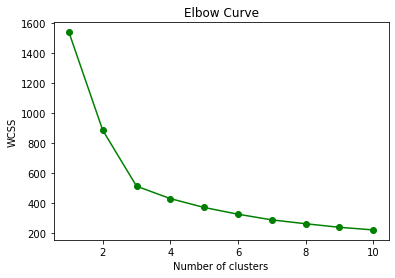

In [62]:
#Plotting an elbow curve to check for k value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(PCA_wine)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
#Building K-means Clustering model and fitting the data into it
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(PCA_wine)

KMeans(n_clusters=3, random_state=42)

In [64]:
#Creating labels and then creating new column to put into our dataset
KMeans_pca_label=clusters_new.labels_
wine_data['cluster'] = clusters_new.labels_

In [65]:
#Checking how many values fall under each of the clusters created
for i in range(3):
    print("cluster", i)
    print("Total values:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

cluster 0
Total values: 51
cluster 1
Total values: 63
cluster 2
Total values: 64


### Evaluating PCA Clustering methods with the help of Silhouette Score 
>The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguised.<br>
0:Means the distance between clusters is not significant<br>
-1:Means clusters are assigned in the wrong way

In [66]:
#Silhouette Score of Single Linkage Method
PCA_Silhou_SLM=metrics.silhouette_score(PCA_wine,y_PCAhc1)
PCA_Silhou_SLM

0.36310673051041403

In [67]:
#Silhouette Score of Complete Linkage Method
PCA_Silhou_ComLM=metrics.silhouette_score(PCA_wine,y_PCAhc2)
PCA_Silhou_ComLM

0.35784842685673074

In [68]:
#Silhouette Score of Average Linkage Method
PCA_Silhou_ALM=metrics.silhouette_score(PCA_wine,y_PCAhc3)
PCA_Silhou_ALM

0.4465449278023582

In [69]:
#Silhouette Score of Centroid(ward) Linkage Method
PCA_Silhou_CenLM=metrics.silhouette_score(PCA_wine,y_PCAhc4)
PCA_Silhou_CenLM

0.44594921980629687

In [70]:
#Silhouette Score of Kmeans Clustering
PCA_Silhou_KMeans=metrics.silhouette_score(PCA_wine,KMeans_pca_label)
PCA_Silhou_KMeans

0.45323512156839507

In [71]:
#Listing into the table
Table1={'Model':pd.Series(['PCA_SingleLinakge','PCA_CompleteLinkage','PCA_AverageLinkage','PCA_CentroidLinkage','PCA_KMeans']),
  'PCA_Silhouette score':[PCA_Silhou_SLM,PCA_Silhou_ComLM,PCA_Silhou_ALM,PCA_Silhou_CenLM,PCA_Silhou_KMeans]
  }
Table1=pd.DataFrame(Table1)
Table1

,Model,PCA_Silhouette score
0,PCA_SingleLinakge,0.363107
1,PCA_CompleteLinkage,0.357848
2,PCA_AverageLinkage,0.446545
3,PCA_CentroidLinkage,0.445949
4,PCA_KMeans,0.453235


In [72]:
#Tabulating the clustering silhouette score and PCA Clustered Silhouette score
Final={'Model_HC':pd.Series(['HC_SingleLinakge','HC_CompleteLinkage','HC_AverageLinkage','HC_CentroidLinkage','KMeans']),
  'HC_Silhouette score':[Silhou_SLM,Silhou_ComLM,Silhou_Average,Silhou_CenLM,Silhou_KMeans],
  'Mode1_PCA':['PCA_SingleLinakge','PCA_CompleteLinkage','PCA_AverageLinkage','PCA_CentroidLinkage','PCA_KMeans'],
  'PCA_Silhouette score':[PCA_Silhou_SLM,PCA_Silhou_ComLM,PCA_Silhou_ALM,PCA_Silhou_CenLM,PCA_Silhou_KMeans]
  }
Final=pd.DataFrame(Final)
Final

,Model_HC,HC_Silhouette score,Mode1_PCA,PCA_Silhouette score
0,HC_SingleLinakge,0.222451,PCA_SingleLinakge,0.363107
1,HC_CompleteLinkage,0.193825,PCA_CompleteLinkage,0.357848
2,HC_AverageLinkage,0.229458,PCA_AverageLinkage,0.446545
3,HC_CentroidLinkage,0.277444,PCA_CentroidLinkage,0.445949
4,KMeans,0.284859,PCA_KMeans,0.453235


#### Insights Drawn:
>From the above table it depicts that before performing PCA the cluster result is similar. But, after performing PCA, we gain a double silhohuette score, which means that the complexity or overlaping of data is decreased after performing PCA.